# Thyroid Cancer Prediction Model

### Importing necessary python libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:/wordpress/Project/Thyroid Cancer/Thyroid_train.csv")

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


<Axes: >

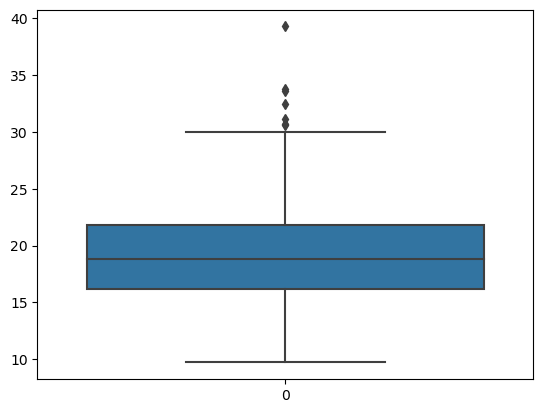

In [6]:
sns.boxplot(df['mean_texture'])

In [7]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

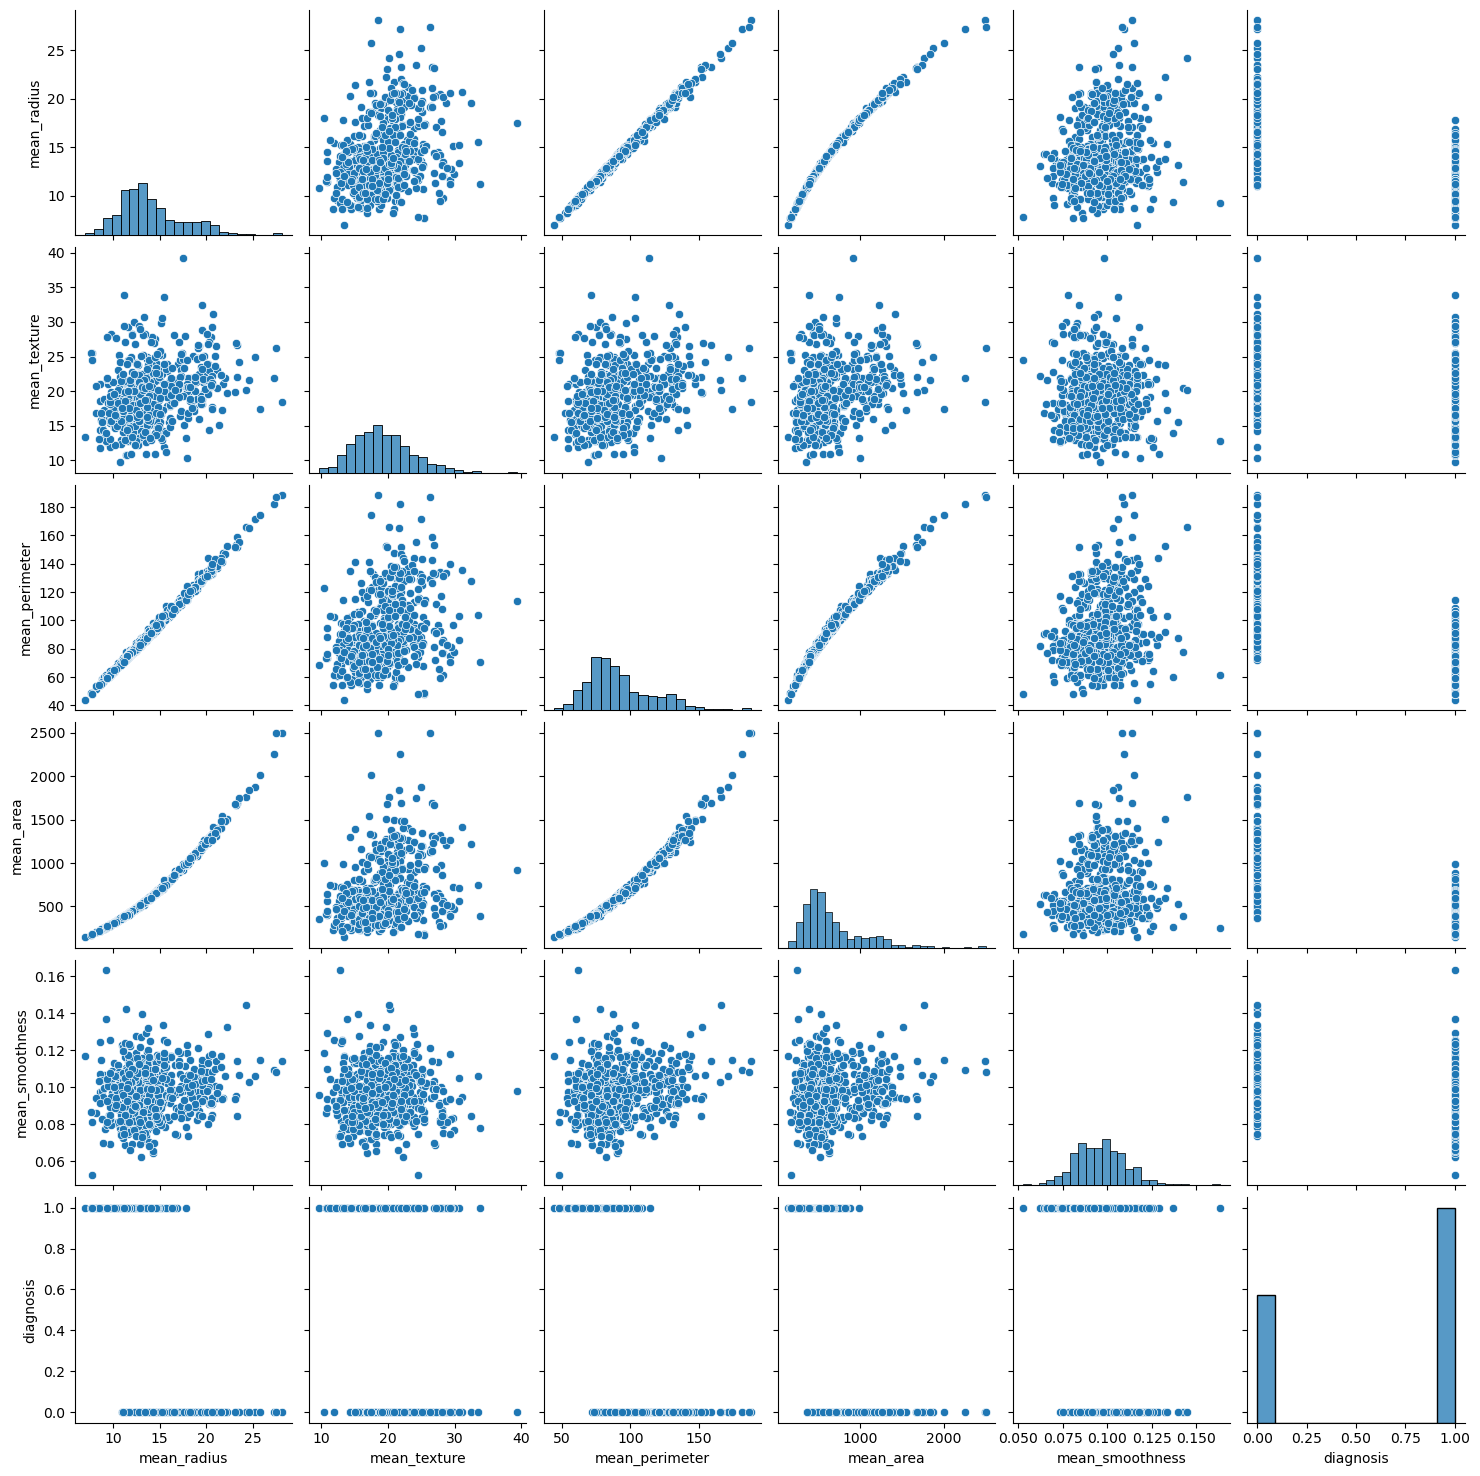

In [8]:
sns.pairplot(df)

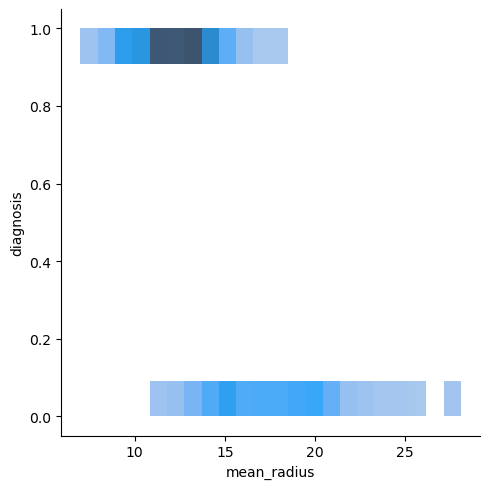

In [9]:
sns.displot(x='mean_radius',y='diagnosis',data=df)

<Axes: xlabel='mean_area', ylabel='Density'>

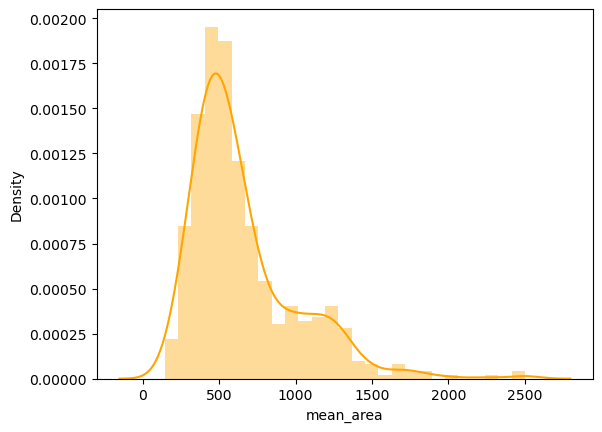

In [10]:
sns.distplot(df['mean_area'],color='orange')

### Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()

In [13]:
ss.fit(df.drop('diagnosis',axis=1))

StandardScaler()

In [14]:
scaled_feature = ss.transform(df.drop('diagnosis',axis=1))

In [15]:
dff = pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [16]:
dff

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372
...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842
565,1.704854,2.085134,1.615931,1.723842,0.102458
566,0.702284,2.045574,0.672676,0.577953,-0.840484
567,1.838341,2.336457,1.982524,1.735218,1.525767


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(dff,df['diagnosis'],test_size=0.2)

In [39]:
pred = rfc.predict(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier()

In [41]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.99      1.00      0.99        69

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [45]:
df.columns.tolist()

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'diagnosis']

In [46]:
x = df[['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness']].values
y = df[['diagnosis']].values

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [48]:
rfc = RandomForestClassifier()

### Training model without preprocessing 

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
pred = rfc.predict(X_test)
pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.93      0.93      0.93        73

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



## SVM

In [56]:
from sklearn.svm import SVC

In [57]:
s = SVC()

In [58]:
s.fit(X_train,y_train)

SVC()

In [59]:
s_pred = s.predict(X_test)

In [60]:
print(classification_report(y_test,s_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.89      0.97      0.93        73

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc = DecisionTreeClassifier()

In [63]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
d_pred= dtc.predict(X_test)

In [42]:
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.88      0.96      0.92        68

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114

